# M4 - WEEK 4 | PROJECT: Investigate the Airbnb Data


**Business Background:**

Airbnb has successfully disrupted the traditional hospitality industry as more and more travelers decide to use Airbnb as their primary accommodation provider. Since its beginning in 2008, Airbnb has seen an enormous growth, with the number of rentals listed on its website growing exponentially each year. In Germany, no city is more popular than Berlin. That implies that Berlin is one of the hottest markets for Airbnb in Europe, with over 22,552 listings as of November 2018.

**Project Scope:**

As a 'Chief Data Scientist' get the deeper insights on trends for below areas:

* Airbnb Neighbourhood trends in Berlin : 

 - costs for neighbouthood group 
 - availablity(round the year) for the neighbouringhood group
 - reviews for neighbourhood group in Berlin


* Airbnb Reviews trends in Berlin :

 - reviews for: property_type, room_type, bathrooms, bedrooms, bed_types, accommodates 
 - review  for 3 years: form Year-2016 TO Year-2018
 - review  from english speaking
 

**Data Source:** 

Airbnb dataset: https://www.kaggle.com/brittabettendorf/berlin-airbnb-data 

**Tool and Packages:**

 * python language 3.7.2
 * python library : numpy, pandas, matplotlib.pyplot
 
**Project Team:**

* Khushboo Nandal
* Mani Jangde
* Reza Khajavinia


### Converting raw data into a form ready for data analysis

loading all dataset and clean it for data analysis.There are six datasets given here, we will perfom below cleaning steps to each dataset:

* column name - check for the readability, accuracy and un-wanted characters:
* un-wanted column - check for the column that can be dropped
* dulicated data - check for duplicates rows
* Missing/NaN values - look for NaN or Missing values


In [1]:
#import pacakages and libs:

import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#### *cleaning  dataset: reviews_summary*

In [2]:
#load 'reviews_summary' dataset:

df_rs=pd.read_csv("reviews_summary.csv")
print("***FIRST 2 ROWS OF DATAFRAME***\n")
df_rs.head(2)


***FIRST 2 ROWS OF DATAFRAME***



,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2015,69544350,2016-04-11,7178145,Rahel,Mein Freund und ich hatten gute gemütliche vie...
1,2015,69990732,2016-04-15,41944715,Hannah,Jan was very friendly and welcoming host! The ...


In [3]:
# Here as per the CASE/PROBLEM we are dropping below columns columns:
df_rs.drop(['reviewer_id', 'reviewer_name'], axis=1, inplace=True)

#check duplicates:
print("\n\n***ANY DUPLICATE OBSERVATION IN DATASET: ", df_rs.duplicated().sum())

#check missing values or NaN values:
print("\n\n***SUM OF MISSING VALUES IN DATASET: \n", df_rs.isnull().sum())

print("\n\n***SHAPE OF DATAFRAME***\n")
print(df_rs.shape)

print("\n\n***DATA TYPES OF ALL COLUMN's DATAFRAME***\n")
print(df_rs.dtypes)



***ANY DUPLICATE OBSERVATION IN DATASET:  0


***SUM OF MISSING VALUES IN DATASET: 
 listing_id      0
id              0
date            0
comments      496
dtype: int64


***SHAPE OF DATAFRAME***

(401963, 4)


***DATA TYPES OF ALL COLUMN's DATAFRAME***

listing_id     int64
id             int64
date          object
comments      object
dtype: object


#### *cleaning  dataset: reviews*

In [4]:
#load 'reviews' dataset:

df_rev=pd.read_csv("reviews.csv")
print("***FIRST 2 ROWS OF DATAFRAME***")
df_rev.head(2)



***FIRST 2 ROWS OF DATAFRAME***


,listing_id,date
0,2015,2016-04-11
1,2015,2016-04-15


In [5]:
# Here as per the CASE/PROBLEM we are dropping below columns columns:


#check duplicates:
print("\n\n***ANY DUPLICATE OBSERVATION IN DATASET: ", df_rev.duplicated().sum())

#check missing values or NaN values:
print("\n\n***SUM OF MISSING VALUES IN DATASET: \n", df_rev.isnull().sum())

print("\n\n***SHAPE OF DATAFRAME***\n")
print(df_rev.shape)

print("\n\n***DATA TYPES OF ALL COLUMN's DATAFRAME***\n")
print(df_rev.dtypes)




***ANY DUPLICATE OBSERVATION IN DATASET:  1242


***SUM OF MISSING VALUES IN DATASET: 
 listing_id    0
date          0
dtype: int64


***SHAPE OF DATAFRAME***

(401963, 2)


***DATA TYPES OF ALL COLUMN's DATAFRAME***

listing_id     int64
date          object
dtype: object


#### *cleaning  dataset: neighbourhoods*

In [6]:
# load 'neighbourhoods' dataset:

df_nebr=pd.read_csv("neighbourhoods.csv")
print("***FIRST 2 ROWS OF DATAFRAME***\n")
df_nebr.head(2)



***FIRST 2 ROWS OF DATAFRAME***



,neighbourhood_group,neighbourhood
0,Charlottenburg-Wilm.,Barstraße
1,Charlottenburg-Wilm.,Charlottenburg Nord


In [7]:
# Here as per the CASE/PROBLEM we are dropping below columns columns:

#check duplicates:
print("\n\n***ANY DUPLICATE OBSERVATION IN DATASET: ", df_nebr.duplicated().sum())

#check missing values or NaN values:
print("\n\n***SUM OF MISSING VALUES IN DATASET:\n ", df_nebr.isnull().sum())

print("\n\n***SHAPE OF DATAFRAME***\n")
print(df_nebr.shape)

print("\n\n***DATA TYPES OF ALL COLUMN's DATAFRAME***\n")
print(df_nebr.dtypes)



***ANY DUPLICATE OBSERVATION IN DATASET:  0


***SUM OF MISSING VALUES IN DATASET:
  neighbourhood_group    1
neighbourhood          1
dtype: int64


***SHAPE OF DATAFRAME***

(139, 2)


***DATA TYPES OF ALL COLUMN's DATAFRAME***

neighbourhood_group    object
neighbourhood          object
dtype: object


#### *cleaning  dataset: listings_summary*

In [8]:
# load 'listings_summary' dataset:

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

df_ls=pd.read_csv("listings_summary.csv")
print("***FIRST 2 ROWS OF DATAFRAME***\n")
df_ls.head(2)



***FIRST 2 ROWS OF DATAFRAME***



,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,"This is my home, not a hotel. I rent out occas...","Close to U-Bahn U8 and U2 (metro), Trams M12, ...","Simple kitchen/cooking, refrigerator, microwav...",Always available,"No parties No events No pets No smoking, not e...",NaN,NaN,https://a0.muscache.com/im/pictures/260fd609-7...,NaN,2217,https://www.airbnb.com/users/show/2217,Ian,2008-08-18,"Key Biscayne, Florida, United States",Believe in sharing economy.,within an hour,96%,NaN,t,https://a0.muscache.com/im/pictures/21428a22-4...,https://a0.muscache.com/im/pictures/21428a22-4...,Mitte,4.0,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",Mitte,Brunnenstr. Süd,Mitte,Berlin,Berlin,10119,Berlin,"Berlin, Germany",DE,Germany,52.534537,13.402557,f,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,$60.00,NaN,NaN,$200.00,$30.00,1,$28.00,4,1125,3 months ago,t,0,21,51,141,2018-11-07,118,2016-04-11,2018-10-28,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,NaN,Within walking distance you'll find the S-Bahn...,Außer deinem Zimmer kannst du noch die Küche u...,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/97d4f6e8-1...,NaN,2986,https://www.airbnb.com/users/show/2986,Michael,2008-09-16,"Berlin, Berlin, Germany",Living with my wife in Berlin. Like travellin...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/50434955-1...,https://a0.muscache.com/im/pictures/50434955-1...,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",NaN,Prenzlauer Berg Nordwest,Pankow,Berlin,Berlin,10437,Berlin,"Berlin, Germany",DE,Germany,52.548513,13.404553,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",NaN,$17.00,NaN,NaN,$0.00,$0.00,1,$0.00,2,40,7 weeks ago,t,0,0,0,0,2018-11-07,6,2018-07-04,2018-10-01,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,NaN,f,f,flexible,f,f,1,1.42


In [9]:
# Here as per the CASE/PROBLEM we are dropping below columns columns:

#check duplicates:
print("\n\n***ANY DUPLICATE OBSERVATION IN DATASET: ", df_ls.duplicated().sum())

#check missing values or NaN values:
print("\n\n***SUM OF MISSING VALUES IN DATASET:\n", df_ls.isnull().sum())

print("\n\n***SHAPE OF DATAFRAME***\n")
print(df_ls.shape)

print("\n\n***DATA TYPES OF ALL COLUMN's DATAFRAME***\n")
print(df_ls.dtypes)





***ANY DUPLICATE OBSERVATION IN DATASET:  0


***SUM OF MISSING VALUES IN DATASET:
 id                                      0
listing_url                             0
scrape_id                               0
last_scraped                            0
name                                   59
summary                               963
space                                8532
description                           203
experiences_offered                     0
neighborhood_overview               11012
notes                               15337
transit                              9516
access                              11715
interaction                         12146
house_rules                         11103
thumbnail_url                       22552
medium_url                          22552
picture_url                             0
xl_picture_url                      22552
host_id                                 0
host_url                                0
host_name                       

#### *cleaning dataset:  listings*

In [10]:
#load 'listings' dataset:


df_lis=pd.read_csv("listings.csv")
print("***FIRST 2 ROWS OF DATAFRAME***\n")
df_lis.head(2)



***FIRST 2 ROWS OF DATAFRAME***



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0


In [11]:
# Here as per the CASE/PROBLEM we are dropping below columns columns:

#check duplicates:
print("\n\n***ANY DUPLICATE OBSERVATION IN DATASET: ", df_lis.duplicated().sum())

#check missing values or NaN values:
print("\n\n***SUM OF MISSING VALUES IN DATASET***\n", df_lis.isnull().sum())

percentage = (df_lis.isnull().sum()/len(df_lis)) * 100
percentage.sort_values()
print("\n\n***MISSING VALUES IN PERCENTAGES***\n", percentage)

print("\n\n***SHAPE OF DATAFRAME***\n")
print(df_lis.shape)

print("\n\n***DATA TYPES OF ALL COLUMN's DATAFRAME***\n")
print(df_lis.dtypes)






***ANY DUPLICATE OBSERVATION IN DATASET:  0


***SUM OF MISSING VALUES IN DATASET***
 id                                   0
name                                59
host_id                              0
host_name                           26
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       3908
reviews_per_month                 3914
calculated_host_listings_count       0
availability_365                     0
dtype: int64


***MISSING VALUES IN PERCENTAGES***
 id                                 0.000000
name                               0.261618
host_id                            0.000000
host_name                          0.115289
neighbourhood_group                0.000000
neighbourhood   

#### *cleaning dataset:  calendar_summary*

In [12]:
#load 'calendar_summary' dataset:

df_cs=pd.read_csv("calendar_summary.csv")
print("FIRST 2 ROWS OF DATAFRAME:\n")
df_cs.head(2)


FIRST 2 ROWS OF DATAFRAME:



,listing_id,date,available,price
0,2015,2019-09-10,f,NaN
1,2015,2019-09-09,f,NaN


In [13]:
# Here as per the CASE/PROBLEM we are dropping below columns columns:

#check duplicates:
print("\n\n***ANY DUPLICATE OBSERVATION IN DATASET: ", df_cs.duplicated().sum())

#check missing values or NaN values:
print("\n\n***SUM OF MISSING VALUES IN DATASET: \n", df_cs.isnull().sum())

print("\n\n***SHAPE OF DATAFRAME***\n")
print(df_cs.shape)

print("\n\n***DATA TYPES OF ALL COLUMN's DATAFRAME***\n")
print(df_cs.dtypes)



***ANY DUPLICATE OBSERVATION IN DATASET:  0


***SUM OF MISSING VALUES IN DATASET: 
 listing_id          0
date                0
available           0
price         6430639
dtype: int64


***SHAPE OF DATAFRAME***

(8231480, 4)


***DATA TYPES OF ALL COLUMN's DATAFRAME***

listing_id     int64
date          object
available     object
price         object
dtype: object


#### *summary of cleaning datasets:*

Looks all six datasets are not that dirty, just feeling lucky!

* reviews_summary -> dorpped 2 collumns: 'reviewer_id','reviewer_name', having missing comments, no harm here for our case.
* reviews -> having 1242 duplicates, need to process in next steps.
* neighbourhoods -> has only 1 missing values, which can be dropped. need to process in next steps.
* listings_summary -> has bigger dataset, having multiple column missing values. need to handle case by case, and for requried column only. we can also get any additional column from here since its having many datapoints.
* listings -> This also has few missing values, which we need to handle.
* calendar_summary -> Here too we got missing values in price need to handle in next steps. And change values of available column f to NO and t to YES. for understanding.


### Implementing data transformation for data analysis:

We will perfom below transformation wherever required to datasets:

* drop duplictes
* re-name/correct datapoints 
* convert appropirate datatypes 
* convert date format
* handle missing values


In [14]:
#In dataset 'reviews' dropping duplicates record:
df_rev = df_rev.drop_duplicates()

#change the date format in datasets:
df_rs.date = pd.to_datetime(df_rs.date, format="%Y-%m-%d")
df_rev.date = pd.to_datetime(df_rev.date, format="%Y-%m-%d")
df_lis.last_review = pd.to_datetime(df_lis.last_review, format="%Y-%m-%d")
df_cs.date = pd.to_datetime(df_cs.date, format="%Y-%m-%d")

#re-name 't' -> YES and 'f' -> NO for available column
df_cs['available'] = df_cs['available'].map({'t': 'YES', 'f': 'NO'})

#handling missing values in datasets:

#dataset 'neighborhood' has only one missing value -> can be drop that sigle record!
df_nebr.dropna(how='any', inplace=True)

#In dataset 'listing' we need clear reviews datapoints. will drop NaN, which is reasonably low in numbers: 
df_lis.dropna(how='any', inplace=True)

#dataset 'calendar_summary' we can replace NaN to Zero in price: 
df_cs.price.fillna(0, inplace=True)




### EDA:Data exploration and analysis
* Extract an interpretation of data using exploratory data analysis (EDA)
* manupulating and tiding dataset
* Visualization

#### *Airbnb neighbourhood_group exploration and analysis:*

In [15]:
#Look for listing datasets objects using describe: will get statistics for the 'neighbourhood_group'

df_lis.describe(include=['object'])


,name,host_name,neighbourhood_group,neighbourhood,room_type
count,18587,18587,18587,18587,18587
unique,18180,5238,12,136,3
top,Berlin Wohnung,Anna,Friedrichshain-Kreuzberg,Tempelhofer Vorstadt,Private room
freq,13,179,4589,1092,9534


In [16]:
#Look listing dataset for numericals statistics using describe: taking only needed columns
df_lis[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,18587.000000,18587.000000,18587.000000,18587.000000,18587.000000,18587.000000
mean,61.990961,6.536127,21.617690,1.138112,1.933502,84.334320
std,145.874539,43.156393,39.464083,1.508100,3.766036,120.513906
min,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,30.000000,2.000000,3.000000,0.180000,1.000000,0.000000
50%,46.000000,2.000000,7.000000,0.540000,1.000000,8.000000
75%,70.000000,4.000000,21.000000,1.510000,1.000000,145.000000
max,8600.000000,5000.000000,498.000000,36.670000,45.000000,365.000000


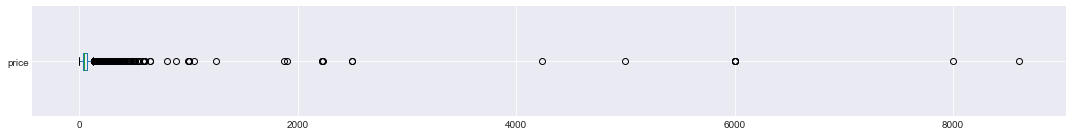

In [17]:
#box plot for outliers detection in 'price' column:

plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(15, 6))
df_lis['price'].plot(kind='box', vert=False, figsize=(15,2))
plt.tight_layout()

In [18]:
#calculate upper and lower bound to clipp 'price': 

q1, q3= np.percentile(df_lis['price'],[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 

print(lower_bound)
print(upper_bound)
print(df_lis['price'].mean())

#clipping it to upper bound:
df_lis['price']=df_lis['price'].clip(upper=130)


-30.0
130.0
61.99096142465164


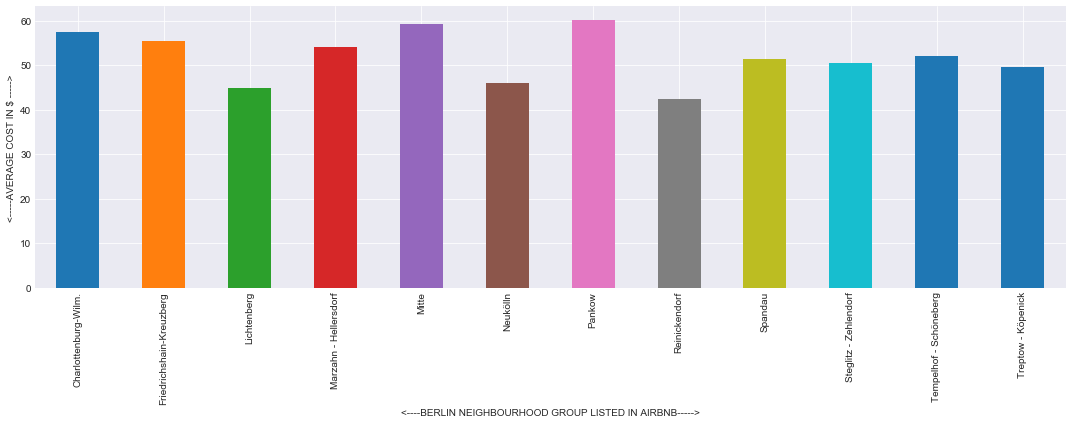

In [19]:
#Plot the COST vs NEIGHBOURHOOD_GROUP in Berlin: 

plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(15, 6))
df_lis.groupby('neighbourhood_group')['price'].mean().plot(kind= 'bar')
plt.xlabel("<----BERLIN NEIGHBOURHOOD GROUP LISTED IN AIRBNB----->")
plt.ylabel("<-----AVERAGE COST IN $ ----->")
plt.tight_layout()

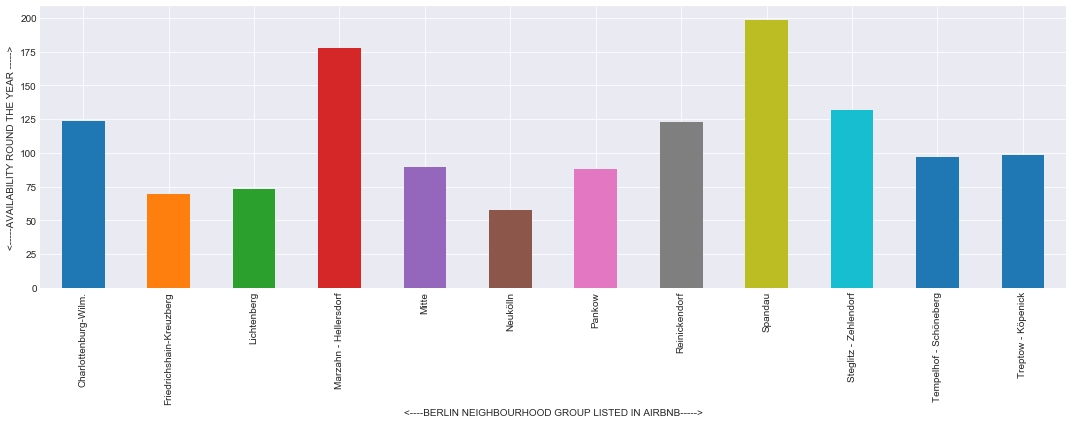

In [20]:
#plot average availablity for the neighbouringhood_group

plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(15, 6))
df_lis.groupby('neighbourhood_group')['availability_365'].mean().plot(kind= 'bar')
plt.xlabel("<----BERLIN NEIGHBOURHOOD GROUP LISTED IN AIRBNB----->")
plt.ylabel("<-----AVAILABILITY ROUND THE YEAR ----->")
plt.tight_layout()


In [21]:
#plot the reveiw count for neighbourhood_group 

df_rs_lis = df_rs.merge(df_lis, left_on='listing_id', right_on='id', how='left', suffixes=('_RS', '_LIS'))
df_rs_lis.head(3)



,listing_id,id_RS,date,comments,id_LIS,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,69544350,2016-04-11,Mein Freund und ich hatten gute gemütliche vie...,2015.0,Berlin-Mitte Value! Quiet courtyard/very central,2217.0,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60.0,4.0,118.0,2018-10-28,3.76,4.0,141.0
1,2015,69990732,2016-04-15,Jan was very friendly and welcoming host! The ...,2015.0,Berlin-Mitte Value! Quiet courtyard/very central,2217.0,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60.0,4.0,118.0,2018-10-28,3.76,4.0,141.0
2,2015,71605267,2016-04-26,Un appartement tres bien situé dans un quartie...,2015.0,Berlin-Mitte Value! Quiet courtyard/very central,2217.0,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60.0,4.0,118.0,2018-10-28,3.76,4.0,141.0


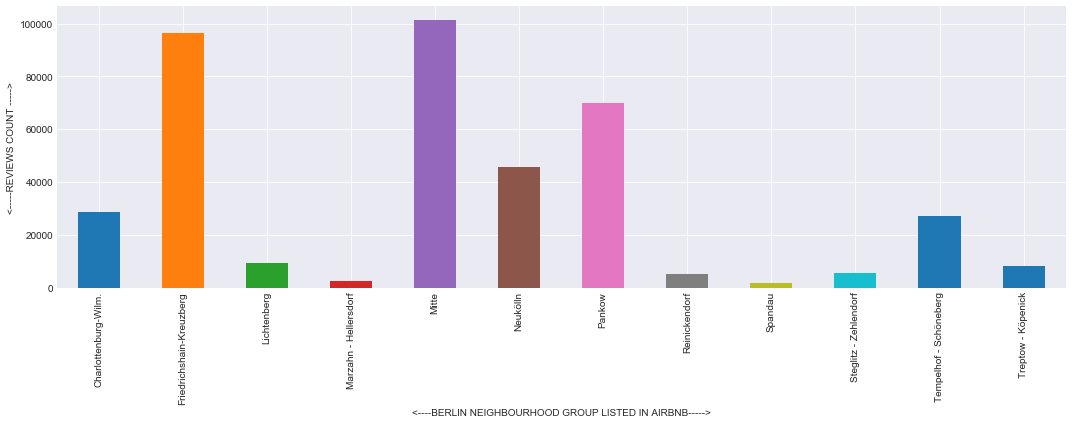

In [22]:
#plot review counts for neighbourhood_group:

plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(15, 6))
df_rs_lis.groupby('neighbourhood_group')['id_RS'].count().plot(kind= 'bar')
plt.xlabel("<----BERLIN NEIGHBOURHOOD GROUP LISTED IN AIRBNB----->")
plt.ylabel("<-----REVIEWS COUNT ----->")
plt.tight_layout()

#### *Airbnb reviews exploration and analysis:*

In [23]:
# -*- coding: utf-8 -*-

#lets write a code for selecting english reviews:

def check_english(dataframe, column):
    '''Returns list for single column which is in english for dataframe.
    
    parameter : dataframe(dataFrame) : dataframe object
    parameter : column(str) : column name in dataframe
    
    returns : list of strings: list['YES', 'NO']
    '''
    
    is_english = []
    for item in dataframe[column]:
        try:
            str(item).encode(encoding='utf-8').decode('ascii')
        except UnicodeDecodeError:
            is_english.append('NON-ENGLISH_SPEAKING')
        else:
            is_english.append('ENGLISH_SPEAKING')
    return is_english
            
review_english = check_english(df_rs, 'comments')
df_rs['is_english_review'] = review_english
df_rs.head(5)


,listing_id,id,date,comments,is_english_review
0,2015,69544350,2016-04-11,Mein Freund und ich hatten gute gemütliche vie...,NON-ENGLISH_SPEAKING
1,2015,69990732,2016-04-15,Jan was very friendly and welcoming host! The ...,ENGLISH_SPEAKING
2,2015,71605267,2016-04-26,Un appartement tres bien situé dans un quartie...,NON-ENGLISH_SPEAKING
3,2015,73819566,2016-05-10,"It is really nice area, food, park, transport ...",ENGLISH_SPEAKING
4,2015,74293504,2016-05-14,"Buena ubicación, el departamento no está orden...",NON-ENGLISH_SPEAKING


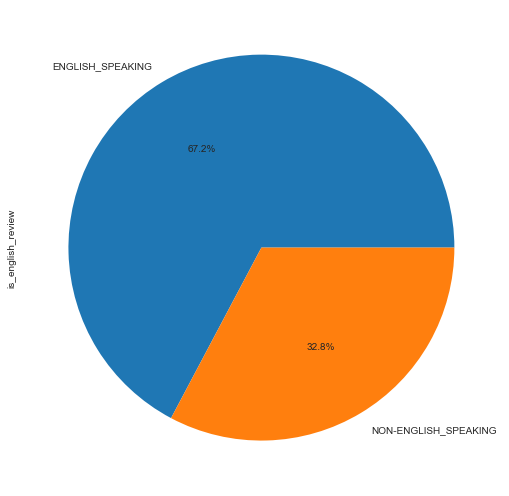

In [24]:
#plot pie chart for ENGLISH_SPEAKING reviews:

plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(10, 7))
df_rs.groupby('is_english_review')['is_english_review'].count().plot(kind= 'pie', autopct='%1.1f%%')
plt.tight_layout()


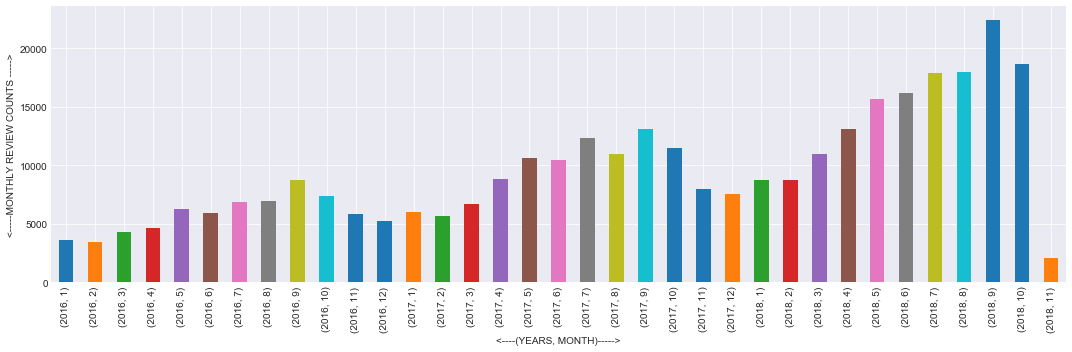

In [25]:
# plot the monthly review counts for 3 years: form Year-2016 TO Year-2018:

plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(15, 5))
df_rs_lis.groupby([df_rs_lis.date.dt.year.values, df_rs_lis.date.dt.month.values])['id_RS'].count()[73:].plot(kind='bar')
plt.xlabel("<----(YEARS, MONTH)----->")
plt.ylabel("<-----MONTHLY REVIEW COUNTS ----->")
plt.tight_layout()

In [26]:
#merging review_sumnary and list_summary dataset:

df_rs_ls = df_rs.merge(df_ls, left_on='listing_id', right_on='id', how='left', suffixes=('_RS', '_LI'))
df_rs_ls = df_rs_ls[['id_RS', 'property_type', 'room_type', 'bathrooms', 'bedrooms', 'bed_type', 'accommodates' ]]
df_rs_ls.head(3)


,id_RS,property_type,room_type,bathrooms,bedrooms,bed_type,accommodates
0,69544350,Guesthouse,Entire home/apt,1.0,1.0,Real Bed,3
1,69990732,Guesthouse,Entire home/apt,1.0,1.0,Real Bed,3
2,71605267,Guesthouse,Entire home/apt,1.0,1.0,Real Bed,3


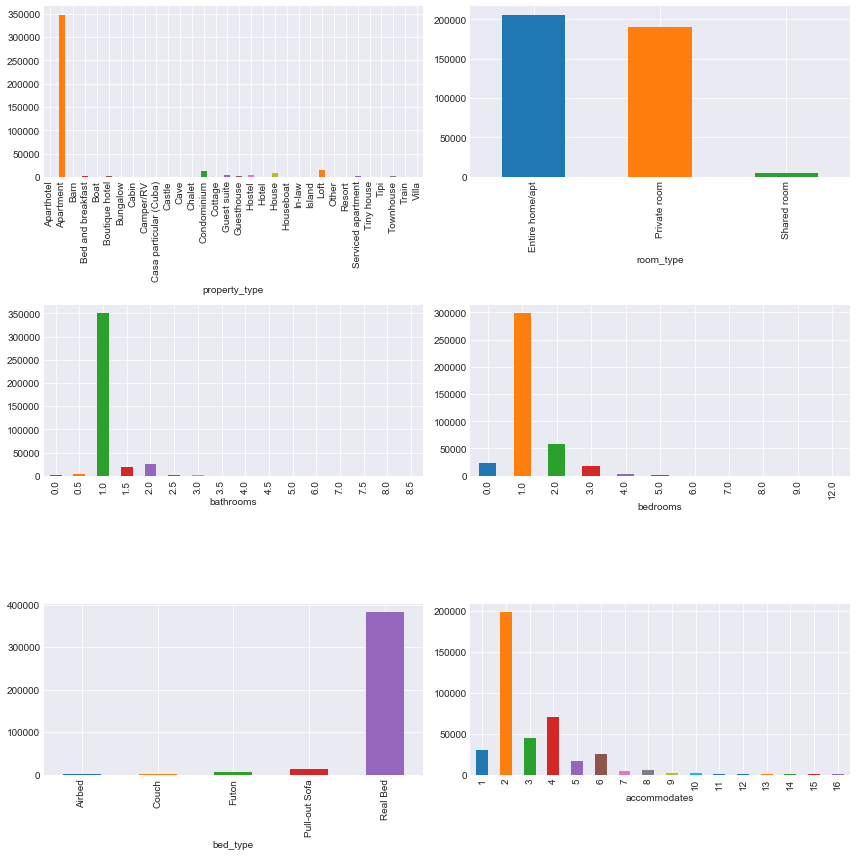

In [27]:
#plot reviews count for different: property_type, room_type, bathrooms, bedrooms, accommodates  

plt.style.use('seaborn-darkgrid')
fig, axes = plt.subplots(nrows = 3, ncols=2, figsize=(12, 12))
df_rs_ls.groupby('property_type')['id_RS'].count().plot(kind="bar", ax=axes[0,0])
df_rs_ls.groupby('room_type')['id_RS'].count().plot(kind='bar', ax=axes[0,1])
df_rs_ls.groupby('bathrooms')['id_RS'].count().plot(kind='bar', ax=axes[1,0])
df_rs_ls.groupby('bedrooms')['id_RS'].count().plot(kind='bar', ax=axes[1,1])
df_rs_ls.groupby('bed_type')['id_RS'].count().plot(kind='bar', ax=axes[2,0])
df_rs_ls.groupby('accommodates')['id_RS'].count().plot(kind='bar', ax=axes[2,1])
plt.tight_layout()

### information and insights

**Airbnb Neighbourhood trends in Berlin :** 

 - costs for neighbouthood group 
 
     There are three costly neighbourhood in Airbnb Belin: Pankow, Mitte, Charlottenburg-Wilm. And lowest cost are 
     Reinickendorf, Lichtenberg, Neukölln. 
     
     That means that 3 top cost neighourhoods are quite in demand!
 
 
     * MAX COST(in Dollers): Pankow(60.19), Mitte(59.20), Charlottenburg-Wilm(57.40) 
     * LOW COST(in Dollers): Reinickendorf(42.41), Lichtenberg(44.81), Neukölln(46.02)
 
 - availablity(round the year) for the neighbouringhood group
 
    There are 3 neighbourhood where availability round the years is high: Spandau, Marzahn - Hellersdorf and Steglitz -         Zehlendorf. And other 3 has very low availability round the year:Neukölln, Friedrichshain-Kreuzberg and Lichtenberg.
    
    That means chances are high to get top 3 neighbourhood round the year in berlin
    
 
    * MAX AVAILABLE: Spandau(198.68), Marzahn - Hellersdorf(177.97), Steglitz - Zehlendorf(131.76)
    * LOW AVAILABLE:  Neukölln(57.33), Friedrichshain-Kreuzberg(69.68), Lichtenberg(73.50)
    
 - reviews for neighbourhood group in Berlin
 
    There are 3 neighbourhood having high review counts: Mitte, Friedrichshain-Kreuzberg and Pankow. And other 3 are having     very less reviews.
        
    That means top 3 neighbourhoods are frequently visiting neighbourhood in Berlin.
    
 
    * Mitte(101409), Friedrichshain-Kreuzberg(96415), Pankow(69924)
    * Spandau(1588), Marzahn - Hellersdorf(2407), Reinickendorf(5086)

-----------------------------------------------------------------------------------------------------------------------

  **Airbnb Reviews trends in Berlin :**


 - review  from English speaking
 
 
    There were many English speaking reviews, so they are not from European countries.
    
 
    * There are 67.2% reviewers speaking english
    
   
 -  review  for 3 years: form Year-2016 To Year-2018
 
 
    In Sept and Oct, there are high numbers of reviews, must be months of tourism/business in Berlin
    
 
    * September and October in all three years were the highest reviews
    * January and February! in all three years were the lowest reviews
    * Every next year, the monthly review counts has been increased
    
   
 - reviews for: property_type, room_type, bathrooms, bedrooms, bed_types, accommodates
 
 
    * Propery_type: Apartment, Condominium, loft were the highest review counts
    * room_type: Entire home/apt, Private room were the highest review counts
    * bathrooms: 1 has significantly highest reveiw counts than in second 2 bathroom
    * bedrooms: 1 has significantly highest review counts than 2 and 3
    * bed_types: real_bed has highest review counts than second pull-out-sofa type
    * accommodates: 2 being significantly highest than 4 and 3 review counts
 
 